# Non-monotonicity of $\sigma_n$ in Lemma 14

The formula of $\sigma_n^2$ is given by 
$$
    \sigma_n^2(v) \;:=\; \mu_2^2 \lambda^2 \text{Var}\bigg[ \frac{1}{(X_n(v)+\lambda)^2} \bigg]
$$
where $X_n(v) \sim \Gamma( \frac{n\mu_2^2}{v}, \frac{n\mu_2}{v})$ in terms of shape-rate parametrization. In terms of shape-scale parametrization (convention used in numpy), shape $k = \frac{n\mu_2^2}{v}$ and scale $\theta = \frac{v}{n\mu_2}$. 

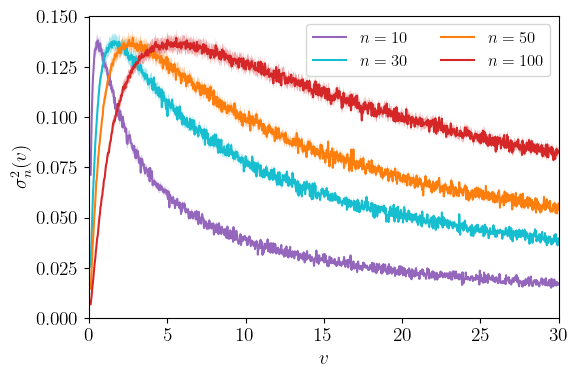

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy.stats

np.random.seed(0)
sim_size = 10000
chi_ppf = np.array([scipy.stats.chi2.ppf(1-0.05/2, sim_size-1), scipy.stats.chi2.ppf(0.05/2, sim_size-1)])

lamb_list = [0.1,0.1, 0.1, 0.1]
mutwo_list = [0.1,0.1, 0.1, 0.1] 
n_list = [ 10, 30, 50, 100 ]
color_list = [ "tab:purple", "tab:cyan", "tab:orange", "tab:red"]

plt.rcParams.update({ 
    "text.usetex": True,
    "font.weight": "heavy",
    "font.size": 14
})
fig = plt.figure(figsize=(6, 4), dpi=100)

v_list = np.linspace(0.1, 30, 1000)
    
for lamb, mutwo, n, color in zip(lamb_list, mutwo_list, n_list, color_list):
    sigma_n_list = []
    sigma_n_ci_list = []
    for v in v_list:
        print('lambda='+str(lamb)+';mutwo='+str(mutwo)+';n='+str(n)+';v='+str(v),end='\r')
        k = n*(mutwo**2)/v
        theta = v/(n*mutwo)
        gamma_list = np.random.gamma(k, theta, sim_size)
        sigma_n = mutwo**2 * lamb**2 * np.var(1/((gamma_list + lamb)**2), ddof=1)
        sigma_n_ci = (sim_size-1) * sigma_n  / chi_ppf
        sigma_n_list.append(sigma_n)
        sigma_n_ci_list.append(sigma_n_ci)
                             
    plt.plot(v_list, sigma_n_list, label=r'$n='+str(n)+'$', color=color)
    fill_color = np.array(colors.to_rgba(color))
    fill_color[3] *= 0.4   
    plt.fill_between(v_list, [ci[0] for ci in sigma_n_ci_list], [ci[1] for ci in sigma_n_ci_list], facecolor=fill_color)

plt.legend(loc='upper right', prop={'size': 12}, ncol=2)
plt.ylabel(r'$\sigma_n^2(v)$')
plt.xlabel(r'$v$')
plt.xlim([0, 30])

plt.tight_layout()
plt.savefig('fig4_simulation_non_monotone_ridge.pdf', dpi=fig.dpi, bbox_inches='tight')
plt.show()